# import modules

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from collections import Counter
import matplotlib.pyplot as plt 

In [2]:
def numpy_distance(x,y):
    return np.linalg.norm(x-y) ### Calculates Euclidean distance between two points



# loading of data set

In [3]:

data = pd.read_csv("C:/Users/LC/Desktop/Iris.csv") 

# split input

In [4]:
X = data.to_numpy()    ## making X as the features or the input parameters                      
X = X[:,1:5]

Y = data.to_numpy()  ## Making Y to contain the output(label) of the data points or features
Y = Y[:,5]

In [5]:
## Splitting the data such that 80% of the data used for training the model and
## 20% data is used to test the modes
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2) 

# imputation k- mean

In [6]:
## Empty list which will hold the accuracy values of corresponding K value
accuracy = []
K = np.arange(1,35)  ## K is a list [1,2,.....34]

for k in K:   ## For each value of k we test the model
    prediction = []   ## Prediction of each test case will be stored in this list
    coorect_count = 0  ## how many correct predictions were made
    for i in range(len(X_test)):  ## for each point in testing data we do prediction
        distances = []
        for j in range(len(X_train)):
            dist = numpy_distance(X_test[i], X_train[j])
            ## we are adding the training point, the distance between this training point and
            ## the test point and the label assosciated with the training point
            distances.append((X_train[j], dist, y_train[j]))  
        ## We are sorting this distance list on the basis of distance between the trainin
        ## point and the test point 
        ## key=lambda x: x[1]  here x:x[1] signifies that we will sort this list using 
        ## 2nd(in python indexing starts from 0) column i.e. distance
        distances.sort(key=lambda x: x[1])
        neighbors = distances[:k] ## Considering k closest points
        class_counter = Counter()  ## a counter to check which labels appeared how many times
        for neighbor in neighbors:
            class_counter[neighbor[2]] += 1
        prediction.append(class_counter.most_common(1)[0][0])## whichever appers most we predict that label 
        if(y_test[i] == prediction[i]):  ## if prediction is correct than increase correct count
            coorect_count = coorect_count + 1
    acc = coorect_count/float(len(X_test))  ## accuracy
    accuracy.append(acc)

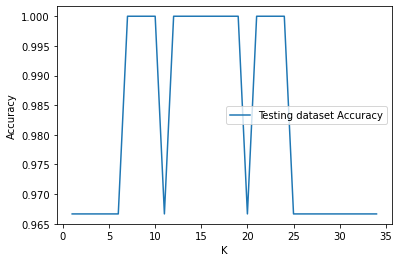

In [7]:
## plot of accuracy and value of K
plt.plot(K, accuracy, label = 'Testing dataset Accuracy')
plt.legend() 
plt.xlabel('K') 
plt.ylabel('Accuracy') 
plt.show()

# KNN_sklearn

In [8]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt 

In [10]:
data = pd.read_csv("C:/Users/LC/Desktop/Iris.csv") ### loading of data set
X = data.to_numpy() ## making X as the features or the input parameters  
X = X[:,1:5]
Y = data.to_numpy()## Making Y to contain the output(label) of the data points or features
Y = Y[:,5]

In [11]:
## Splitting the data such that 80% of the data used for training the model and
## 20% data is used to test the modes
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2) 


In [12]:
## Empty list which will hold the accuracy values of corresponding K values
test_accuracy = []
K = np.arange(1,35) 

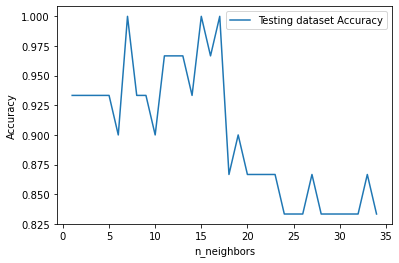

In [13]:
# Loop over K values 
for k in K: 
    knn = KNeighborsClassifier(n_neighbors=k) ## creation of model
    knn.fit(X_train, y_train)  ## fitting of the model
    # Compute traning and test data accuracy 
    test_accuracy.append(knn.score(X_test, y_test)) ## predicting and the calculating the accuracy
  
# Generate plot 
plt.plot(K, test_accuracy, label = 'Testing dataset Accuracy') 
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

# Plotting_of_IRIS

In [14]:

import pandas as pd 
import matplotlib.pyplot as plt

In [17]:

data = pd.read_csv("C:/Users/LC/Desktop/Iris.csv") 

In [18]:
setosa=data[data['Species']=='Iris-setosa']           ## Data points which has Setosa as labels
versicolor=data[data['Species']=='Iris-versicolor']## Data points which has Versicolor as labels
virginica =data[data['Species']=='Iris-virginica'] ## Data points which has Verginica as labels


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

<Figure size 432x288 with 0 Axes>

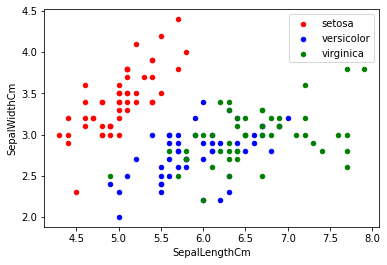

In [20]:
plt.figure()             
fig,ax=plt.subplots(1,1)  ## to plot all three labels in ax(same plot)
setosa.plot(x="SepalLengthCm", y="SepalWidthCm", kind="scatter",ax=ax,label='setosa',color='r')
versicolor.plot(x="SepalLengthCm",y="SepalWidthCm",kind="scatter",ax=ax,label='versicolor',color='b')
virginica.plot(x="SepalLengthCm", y="SepalWidthCm", kind="scatter", ax=ax, label='virginica', color='g')


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

<Figure size 432x288 with 0 Axes>

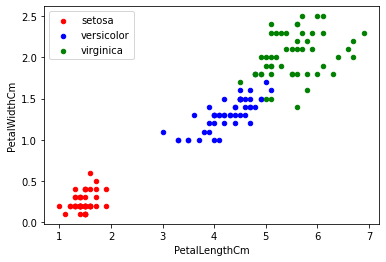

In [21]:

plt.figure()
fig,ax=plt.subplots(1,1)  ## Search how plt.subplots works for more understanding

setosa.plot(x="PetalLengthCm", y="PetalWidthCm", kind="scatter",ax=ax,label='setosa',color='r')
versicolor.plot(x="PetalLengthCm",y="PetalWidthCm",kind="scatter",ax=ax,label='versicolor',color='b')
virginica.plot(x="PetalLengthCm", y="PetalWidthCm", kind="scatter", ax=ax, label='virginica', color='g')